In [11]:
import pandas as pd
import numpy as np
from tqdm import tqdm
#https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#fred
import pandas_datareader.data as web
import datetime

import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 999)

In [42]:
stocks = []
#, "GC.F", "ZS.F", "NG.F"
#, "Gold Futures", "Soybean", "Natural Gas"
tickers = ["^SPX", "^DJI", "^NDQ", "AAPL", "GOOG", "META"]
tickerName = ["S&P500", "DJI", "NDQ", "Apple", "Google", "Meta"]
for stock, ticker in tqdm(zip(tickerName, tickers)):
    f = web.DataReader(ticker, 'stooq')
    f["Ticker"] = stock
    stocks.append(f)

stocks = pd.concat(stocks, axis=0)
stocks = stocks.reset_index()

6it [00:09,  1.57s/it]


In [13]:
# loading in modules
import sqlite3

# creating file path
dbfile = '/content/Headlines.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
#column_names = [a for a in cur.execute("PRAGMA table_info(headline);")]
# here is you table list
print(table_list)


feed = [a for a in cur.execute("SELECT * FROM feed")]
headlines = [a for a in cur.execute("SELECT * FROM headline")]
con.close()

headlines = pd.DataFrame(headlines, columns = ["Url", "Date", "Title", "Description"])
feed = pd.DataFrame(feed, columns = ["Site", "Url"])

newsData = headlines.merge(feed, on="Url")
newsData["Date"] = pd.to_datetime(newsData["Date"])

[('feed',), ('headline',)]


In [ ]:
#"Wall Street Journal Business", "New York Times Business", "CNBC Business", "Market Watch Real Time Headlines", "Market Watch Breaking News Bulletins", "CNBC Finance", "CNBC Personal Finance", "CNBC Market Insider", "CNBC Wealth", "CNBC Mad Money", "New York Times Economy", "CNBC Earnings", "CNBC Real Estate", "CNBC Economy", "CNBC Investing", "FOX Business Markets", "Sky News Business", "Politico Economy", "The Atlantic Business

In [ ]:
newsData.Site.value_counts()

In [ ]:
newsData["Year"] = newsData["Date"].dt.year
newsData["Year"].value_counts()

In [ ]:
newsData["uniqueMonth"] = newsData["Date"].dt.year.astype(str) + " " + newsData["Date"].dt.month.astype(str)
newsData["uniqueMonth"].value_counts()

In [ ]:
print(newsData.Title.isna().sum())
print(newsData.Description.isna().sum())

In [ ]:
newsData.loc[newsData.Title.isna(),"Title"] = ""
newsData.loc[newsData.Description.isna(),"Description"] = ""
newsData.Title.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [ ]:
newsData.loc[newsData.Title.str.contains("Kroger"), :]

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 
        print(val)

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '
text = " ".join(i for i in list(newsData.Title.iloc[0:10000]))
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 5000, height = 4000, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)

# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [ ]:
sites = ["Wall Street Journal Business", "New York Times Business", "CNBC Business", "Market Watch Real Time Headlines", "Market Watch Breaking News Bulletins", "CNBC Finance", "CNBC Personal Finance", "CNBC Market Insider", "CNBC Wealth", "CNBC Mad Money", "New York Times Economy", "CNBC Earnings", "CNBC Real Estate", "CNBC Economy", "CNBC Investing", "FOX Business Markets", "Sky News Business", "Politico Economy", "The Atlantic Business"]

businessNews = newsData[newsData.Site.isin(sites)]

In [ ]:
businessNews.shape

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 
        print(val)

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '
text = " ".join(i for i in list(businessNews.Title.iloc[0:10000]))
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 5000, height = 4000, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text)

# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [5]:
!pip install yfinance

import sqlite3
import pandas as pd
import datetime
import yfinance
import numpy as np
START_DATE = datetime.date(2022, 3, 7)
def date_to_int(string):
    string = string.split(' ')[0]
    date = datetime.datetime.strptime(string, '%Y-%m-%d').date()
    delta = date - START_DATE
    return str(delta.days)

def load_data(database_path: str, shift=5, percentage_split=(0.8, 0.1, 0.1), gap=False, pull_from_first_section=False):
    """
    :param database_path: Path to headlines database
    :param shift: The number of ticks offset the data and labels are. A shift of 5 is the same as one week as weekends
        are clipped from the data.
    :param percentage_split: iterable floats that sum to 1 that represent how the data is split up chronologically
    :param gap: If true, will include a gap where the labels of one section of data overlap with the headlines of the
        next section.
    :param pull_from_first_section: If gap is False, this will do nothing. If True and gap is True, the first
        section of data will be shrunk to allow the other sections to maintain their percentages. If False,
        then each section before the last will be shortened by "shift" to accommodate the gap for
        the proceeding section.
    :return: array of length len(percentage_split)
    """
    con = sqlite3.connect(database_path)
    con.create_function("DATE_TO_INT", 1, date_to_int)
    df = pd.read_sql("""
    SELECT DATE_TO_INT(date) as 'date_int', name, date, title, description
    FROM headline JOIN feed on feed.url=headline.url
    WHERE CAST(date_int as int) >= 0 and
     (CAST(date_int as int)) % 7 < 5 """, con)
    con.close()
    df['date_int'] = pd.to_numeric(df['date_int'])
    df['date'] = pd.to_datetime(df['date']).apply(datetime.datetime.date)
    real_news = df[(df['name'] != 'Babylon Bee (Fake News)') & (df['name'] != 'The Onion (Fake News)')].sort_values('date_int').reset_index().drop(columns=['index'])


    end_date = START_DATE + datetime.timedelta(days=max(real_news['date_int']))
    data = yfinance.download("SPY", start=str(START_DATE), end=str(end_date))['Close'].reset_index()
    data['Date'] = data['Date'].apply(datetime.datetime.date)
    stock_dates = set(data['Date'])
    days = [x for x in [real_news[real_news['date_int'] == x].reset_index().drop(columns=['index']) for x in
                        sorted(set(real_news['date_int']))] if x['date'][0] in stock_dates]

    # Add shift spaces to the end to use for padding
    closing_prices = np.concatenate([data['Close'].to_numpy(), np.zeros((shift,))])

    stacked = np.stack([np.roll(closing_prices, shift), closing_prices])
    data['Label'] = (stacked[1] > stacked[0])[shift:]
    data = data[:-shift]
    days = days[shift:]
    all_data = list(zip(days, (data.T[i] for i in range(len(data)))))
    length = len(all_data)
    lengths = list(map(lambda x: round(x * length), percentage_split))[:-1]

    if len(percentage_split) > 1:
        start = 0
        return_data = []
        if gap and pull_from_first_section:
            lengths[0] -= shift * len(lengths)
        for subset_length in lengths:
            if gap and not pull_from_first_section:
                subset_length -= shift
            return_data.append(all_data[start:start + subset_length])
            start += subset_length
            if gap:
                start += shift
        return_data.append(all_data[start:])
        return return_data
    return all_data




if __name__ == '__main__':
    with_gaps_pull_from_first = load_data("/content/Headlines.db", 5, (0.6, 0.1, 0.3), True, True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


In [6]:
train, val, test = with_gaps_pull_from_first
last_date_train = train[-1][0].date.astype("str").iloc[0]
first_date_val = val[0][0].date.astype("str").iloc[0]
first_date_test = test[0][0].date.astype("str").iloc[0]

In [44]:

sites = ["Wall Street Journal Business", "New York Times Business", "CNBC Business", "Market Watch Real Time Headlines", "Market Watch Breaking News Bulletins", "CNBC Finance", "CNBC Personal Finance", "CNBC Market Insider", "CNBC Wealth", "CNBC Mad Money", "New York Times Economy", "CNBC Earnings", "CNBC Real Estate", "CNBC Economy", "CNBC Investing", "FOX Business Markets", "Sky News Business", "Politico Economy", "The Atlantic Business"]

businessNews = newsData[newsData.Site.isin(sites)]
businessNews=businessNews[businessNews.Date.dt.year>2021]
businessNews.reset_index(inplace=True, drop=True)
businessNews["dayOfYear"] = businessNews["Date"].dt.strftime('%j').astype(int)

stocks["Log_Close"] = np.log(stocks.Close)
stocks["Close_Change"] = stocks["Log_Close"].shift(5) - stocks["Log_Close"]
stocks["Price_Class"] = (stocks["Close_Change"]>=0).astype(int)
stocks["DayOfYear"] = stocks.Date.dt.dayofyear
stocks.dropna(inplace=True)

stocks=stocks.loc[stocks.Date.dt.year>2021]
#stocks=stocks.loc[stocks["DayOfYear"]<=245]
stocks.reset_index(inplace=True, drop=True)

In [45]:
stocks["Price_Class"].mean()

0.44385026737967914

In [46]:
import torch
import torch.utils.data as data
from torch.utils.data import DataLoader

#first, install the hugging face transformer package in your colab
!pip install transformers
from transformers import get_linear_schedule_with_warmup
from tokenizers.processors import BertProcessing

bert_model_name = 'distilbert-base-uncased' 
##YOUR CODE HERE##
from transformers import DistilBertModel, DistilBertTokenizer
bert_model = DistilBertModel.from_pretrained(bert_model_name)
tokenizer = DistilBertTokenizer.from_pretrained(bert_model_name)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

bert_model = bert_model.to(device).eval()

In [48]:
texts = businessNews.Title.to_numpy()
embeddings = []
for i in tqdm(range(0, businessNews.shape[0], 1000)):
    encodings = tokenizer(
        list(texts[i:i+1000]), # the texts to be tokenized
        padding=True, # pad the texts to the maximum length (so that all outputs have the same length)
        return_tensors='pt' # return the tensors (not lists)
    ).to(device)
    with torch.no_grad():
      embeds = bert_model(**encodings)
      embeddings.append(embeds[0][:,0,:].cpu().numpy())
embeddings = np.concatenate(embeddings, axis=0)


100%|██████████| 30/30 [00:43<00:00,  1.45s/it]


In [49]:
embeddingData = np.zeros((365, 768))
for day in range(365):
    subset = np.where(businessNews["dayOfYear"] == day+1)[0]
    if subset.shape[0] == 0:
      print(day)
      continue
    embeddingData[day ,:] = embeddings[subset,:].mean(axis=0)
embeddingData = torch.Tensor(embeddingData)

310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364


In [67]:
class AverageMeter(object):
    def __init__(self, name: str, fmt: str = ":f") -> None:
        self.name = name
        self.fmt = fmt
        self.reset()
    def reset(self) -> None:
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
    def update(self, val: float, n: int = 1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
    def __str__(self):
        fmtstr = "{name} {val" + self.fmt + "} ({avg" + self.fmt + "})"
        return fmtstr.format(**self.__dict__)
class EmbeddingLoader(data.Dataset):
    def __init__(self, stocks, embeddings):
        self.stockData = stocks
        self.embeddings = embeddings
    def __getitem__(self, index):
        data = self.stockData.loc[index,["DayOfYear", "Price_Class","Ticker"]]

        x = self.embeddings[data["DayOfYear"]-1,:]
        y = data["Price_Class"]
        ticker = data["Ticker"]
        return x, y, ticker # "Ticker"

    def __len__(self) -> int:
        return self.stockData.shape[0]

import torch.nn as nn
class MLP(nn.Module):
    def __init__(self, tickers):
        super().__init__()

        #Remove first and last layer. Replace the first one with a convolution of grey scale
        self.fc_layers = nn.Sequential(
          nn.Linear(768, 128),
          nn.ReLU(),
          nn.Dropout(.3),
          nn.Linear(128, 1),
          nn.Sigmoid()
        )


        #self.moduleList = nn.ModuleList([nn.Sequential(nn.Linear(128,1),nn.Sigmoid()) for i in range(6)])
        #self.tickerList = tickers 

    def forward(self, x, tickers):
      output = self.fc_layers(x)

      #output = torch.zeros((x.shape[0],1)).to(device)
      #for i, ticker in enumerate(self.tickerList):
      #  if x[tickers==ticker].shape[0] == 0:
      #    continue

      #  output[tickers==ticker] = self.moduleList[i](x[tickers==ticker])


      return output


endTrain = "2022-07-01"
stockTickers = stocks#[stocks.Ticker.isin(["NDQ"])]
train_dataset = EmbeddingLoader(stockTickers[stockTickers["Date"] < last_date_train].reset_index(drop=True), embeddingData)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) #dataloader_args

validation_dataset = EmbeddingLoader(stockTickers[(stockTickers["Date"] >= first_date_val) & (stockTickers["Date"] < first_date_test)].reset_index(drop=True), embeddingData)
validation_loader = DataLoader(validation_dataset, batch_size=128, shuffle=False) #dataloader_args

test_dataset = EmbeddingLoader(stockTickers[(stockTickers["Date"] >= first_date_test)].reset_index(drop=True), embeddingData)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False) #dataloader_args

tickers = list(stocks.Ticker.unique())

proportionOnes = stockTickers[stockTickers["Date"] < endTrain]["Price_Class"].mean()
print(stockTickers[stockTickers["Date"] < endTrain]["Price_Class"].mean())
print(stockTickers[stockTickers["Date"] >= endTrain]["Price_Class"].mean())

0.41397849462365593
0.4831858407079646


In [68]:
print(len(train_dataset))
print(len(validation_dataset))
print(len(test_dataset))

810
126
337


In [77]:
num_epochs = 100
model = MLP(tickers).to(device)
proportionOnes = stockTickers[stockTickers["Date"] < endTrain]["Price_Class"].mean()
learning_rate=0.00005
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

train_loss_history = []
train_accuracy_history = []
validation_loss_history = []
validation_accuracy_history = []
val_history = []
test_history = []
for epoch_idx in range(num_epochs):
    model.train()

    train_loss_meter = AverageMeter("train loss")
    train_acc_meter = AverageMeter("train accuracy")

    # loop over each minibatch
    for (x, y, tickers) in tqdm(train_loader):
        x = x.to(device)
        y = y.to(device).float()
        n = x.shape[0]
        outputs = model(x, np.array(tickers))

        weight = torch.zeros(y.shape[0],device=device)
        weight[y==1] = 1-proportionOnes
        weight[y==0] = proportionOnes
        criterion = nn.BCELoss(weight = weight)

        batch_loss = criterion(outputs.reshape(-1), y.reshape(-1)) #/

        train_loss_meter.update(val=float(batch_loss.cpu().item()), n=n)
        
        train_acc_meter.update(val=((outputs>.5).reshape(-1)==y).float().mean().item() ,n=n)

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

    train_loss, train_acc = train_loss_meter.avg, train_acc_meter.avg
    train_loss_history.append(train_loss)
    train_accuracy_history.append(train_acc)


    model.eval()
    val_loss_meter = AverageMeter("val loss")
    val_acc_meter = AverageMeter("val accuracy")
    val_preds = []
    val_labels = []
    with torch.no_grad():
      for (x, y, tickers) in tqdm(validation_loader):
          x = x.to(device)
          y = y.to(device).float()
          n = x.shape[0]
          outputs = model(x, np.array(tickers))

          weight = torch.zeros(y.shape[0],device=device)
          weight[y==1] = 1-proportionOnes
          weight[y==0] = proportionOnes
          criterion = nn.BCELoss(weight = weight)

          batch_loss = criterion(outputs.reshape(-1), y.reshape(-1)) #/

          val_loss_meter.update(val=float(batch_loss.cpu().item()), n=n)
          val_acc_meter.update(val=((outputs>.5).reshape(-1)==y).float().mean().item() ,n=n)

          val_preds.extend(outputs.cpu().numpy().tolist())
          val_labels.extend(y.cpu().numpy().tolist())

    val_history.append(val_preds)
    val_loss, val_acc =  val_loss_meter.avg, val_acc_meter.avg
    validation_loss_history.append(val_loss)
    validation_accuracy_history.append(val_acc)


    test_preds = []
    test_labels = []
    with torch.no_grad():
      for (x, y, tickers) in tqdm(test_loader):
          x = x.to(device)
          y = y.to(device).float()
          n = x.shape[0]
          outputs = model(x, np.array(tickers))

          test_preds.extend(outputs.cpu().numpy().tolist())
          test_labels.extend(y.cpu().numpy().tolist())
    test_history.append(test_preds)

    print(
        f"Epoch:{epoch_idx + 1}"
        + f" Train Loss:{train_loss:.4f}"
        + f" Val Loss: {val_loss:.4f}"
        + f" Train Accuracy: {train_acc:.4f}"
        + f" Validation Accuracy: {val_acc:.4f}"
    )
    #for g in optimizer.param_groups:
    #  g['lr'] = g['lr'] * .99

    
    
val_preds = np.array(val_preds).reshape(-1)
val_labels = np.array(val_labels).reshape(-1)

test_preds = np.array(test_preds).reshape(-1)
test_labels = np.array(test_labels).reshape(-1)

100%|██████████| 3/3 [00:00<00:00,  5.17it/s]


Epoch:1 Train Loss:0.3396 Val Loss: 0.3538 Train Accuracy: 0.4519 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00,  5.43it/s]


Epoch:2 Train Loss:0.3388 Val Loss: 0.3489 Train Accuracy: 0.4642 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  6.43it/s]


Epoch:3 Train Loss:0.3387 Val Loss: 0.3426 Train Accuracy: 0.4901 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  5.31it/s]


Epoch:4 Train Loss:0.3375 Val Loss: 0.3468 Train Accuracy: 0.4691 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  8.53it/s]


Epoch:5 Train Loss:0.3364 Val Loss: 0.3442 Train Accuracy: 0.5642 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  7.92it/s]


Epoch:6 Train Loss:0.3379 Val Loss: 0.3553 Train Accuracy: 0.4704 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00,  8.56it/s]


Epoch:7 Train Loss:0.3366 Val Loss: 0.3485 Train Accuracy: 0.5037 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.54it/s]


Epoch:8 Train Loss:0.3369 Val Loss: 0.3441 Train Accuracy: 0.5432 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


Epoch:9 Train Loss:0.3340 Val Loss: 0.3472 Train Accuracy: 0.4815 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  9.23it/s]


Epoch:10 Train Loss:0.3352 Val Loss: 0.3499 Train Accuracy: 0.5173 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00,  8.98it/s]


Epoch:11 Train Loss:0.3349 Val Loss: 0.3469 Train Accuracy: 0.5198 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  8.69it/s]


Epoch:12 Train Loss:0.3353 Val Loss: 0.3413 Train Accuracy: 0.5173 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  3.45it/s]


Epoch:13 Train Loss:0.3338 Val Loss: 0.3556 Train Accuracy: 0.4914 Validation Accuracy: 0.5159


100%|██████████| 3/3 [00:00<00:00, 13.95it/s]


Epoch:14 Train Loss:0.3352 Val Loss: 0.3454 Train Accuracy: 0.5864 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.29it/s]


Epoch:15 Train Loss:0.3310 Val Loss: 0.3476 Train Accuracy: 0.4938 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 13.44it/s]


Epoch:16 Train Loss:0.3310 Val Loss: 0.3459 Train Accuracy: 0.5691 Validation Accuracy: 0.4524


100%|██████████| 3/3 [00:00<00:00, 13.45it/s]


Epoch:17 Train Loss:0.3323 Val Loss: 0.3479 Train Accuracy: 0.5148 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.24it/s]


Epoch:18 Train Loss:0.3308 Val Loss: 0.3509 Train Accuracy: 0.5346 Validation Accuracy: 0.5159


100%|██████████| 3/3 [00:00<00:00, 13.63it/s]


Epoch:19 Train Loss:0.3299 Val Loss: 0.3463 Train Accuracy: 0.6074 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 13.65it/s]


Epoch:20 Train Loss:0.3296 Val Loss: 0.3445 Train Accuracy: 0.5457 Validation Accuracy: 0.4524


100%|██████████| 3/3 [00:00<00:00, 13.39it/s]


Epoch:21 Train Loss:0.3287 Val Loss: 0.3548 Train Accuracy: 0.5543 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 14.06it/s]


Epoch:22 Train Loss:0.3295 Val Loss: 0.3535 Train Accuracy: 0.5296 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.36it/s]


Epoch:23 Train Loss:0.3249 Val Loss: 0.3407 Train Accuracy: 0.6074 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 14.24it/s]


Epoch:24 Train Loss:0.3275 Val Loss: 0.3506 Train Accuracy: 0.5346 Validation Accuracy: 0.5952


100%|██████████| 3/3 [00:00<00:00, 14.19it/s]


Epoch:25 Train Loss:0.3295 Val Loss: 0.3476 Train Accuracy: 0.5543 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.05it/s]


Epoch:26 Train Loss:0.3244 Val Loss: 0.3482 Train Accuracy: 0.5852 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.93it/s]


Epoch:27 Train Loss:0.3238 Val Loss: 0.3495 Train Accuracy: 0.5926 Validation Accuracy: 0.4524


100%|██████████| 3/3 [00:00<00:00, 13.99it/s]


Epoch:28 Train Loss:0.3221 Val Loss: 0.3388 Train Accuracy: 0.6284 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.95it/s]


Epoch:29 Train Loss:0.3231 Val Loss: 0.3433 Train Accuracy: 0.5827 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.84it/s]


Epoch:30 Train Loss:0.3231 Val Loss: 0.3576 Train Accuracy: 0.5642 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.75it/s]


Epoch:31 Train Loss:0.3200 Val Loss: 0.3462 Train Accuracy: 0.6333 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.45it/s]


Epoch:32 Train Loss:0.3223 Val Loss: 0.3477 Train Accuracy: 0.5840 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 13.62it/s]


Epoch:33 Train Loss:0.3198 Val Loss: 0.3461 Train Accuracy: 0.6370 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.45it/s]


Epoch:34 Train Loss:0.3200 Val Loss: 0.3373 Train Accuracy: 0.6346 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.51it/s]


Epoch:35 Train Loss:0.3223 Val Loss: 0.3492 Train Accuracy: 0.5691 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 13.36it/s]


Epoch:36 Train Loss:0.3166 Val Loss: 0.3570 Train Accuracy: 0.6123 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.92it/s]


Epoch:37 Train Loss:0.3167 Val Loss: 0.3436 Train Accuracy: 0.6617 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.63it/s]


Epoch:38 Train Loss:0.3163 Val Loss: 0.3531 Train Accuracy: 0.6494 Validation Accuracy: 0.5159


100%|██████████| 3/3 [00:00<00:00, 13.61it/s]


Epoch:39 Train Loss:0.3162 Val Loss: 0.3436 Train Accuracy: 0.6457 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.39it/s]


Epoch:40 Train Loss:0.3164 Val Loss: 0.3446 Train Accuracy: 0.6272 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.70it/s]


Epoch:41 Train Loss:0.3140 Val Loss: 0.3523 Train Accuracy: 0.6753 Validation Accuracy: 0.5952


100%|██████████| 3/3 [00:00<00:00, 13.29it/s]


Epoch:42 Train Loss:0.3149 Val Loss: 0.3456 Train Accuracy: 0.6506 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.43it/s]


Epoch:43 Train Loss:0.3123 Val Loss: 0.3487 Train Accuracy: 0.6901 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 13.60it/s]


Epoch:44 Train Loss:0.3112 Val Loss: 0.3474 Train Accuracy: 0.6790 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 13.24it/s]


Epoch:45 Train Loss:0.3139 Val Loss: 0.3618 Train Accuracy: 0.6259 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.48it/s]


Epoch:46 Train Loss:0.3118 Val Loss: 0.3438 Train Accuracy: 0.6568 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.72it/s]


Epoch:47 Train Loss:0.3099 Val Loss: 0.3484 Train Accuracy: 0.6519 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 13.71it/s]


Epoch:48 Train Loss:0.3100 Val Loss: 0.3573 Train Accuracy: 0.6605 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 14.23it/s]


Epoch:49 Train Loss:0.3091 Val Loss: 0.3658 Train Accuracy: 0.6580 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.89it/s]


Epoch:50 Train Loss:0.3092 Val Loss: 0.3692 Train Accuracy: 0.6494 Validation Accuracy: 0.5159


100%|██████████| 3/3 [00:00<00:00, 13.27it/s]


Epoch:51 Train Loss:0.3069 Val Loss: 0.3621 Train Accuracy: 0.6691 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.75it/s]


Epoch:52 Train Loss:0.3072 Val Loss: 0.3434 Train Accuracy: 0.6654 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.40it/s]


Epoch:53 Train Loss:0.3035 Val Loss: 0.3589 Train Accuracy: 0.6728 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.44it/s]


Epoch:54 Train Loss:0.3067 Val Loss: 0.3609 Train Accuracy: 0.6802 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.32it/s]


Epoch:55 Train Loss:0.3037 Val Loss: 0.3599 Train Accuracy: 0.6877 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.34it/s]


Epoch:56 Train Loss:0.3047 Val Loss: 0.3497 Train Accuracy: 0.6741 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 12.86it/s]


Epoch:57 Train Loss:0.3034 Val Loss: 0.3443 Train Accuracy: 0.6691 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.91it/s]


Epoch:58 Train Loss:0.3007 Val Loss: 0.3514 Train Accuracy: 0.6938 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 12.72it/s]


Epoch:59 Train Loss:0.3014 Val Loss: 0.3438 Train Accuracy: 0.7111 Validation Accuracy: 0.5794


100%|██████████| 3/3 [00:00<00:00, 13.53it/s]


Epoch:60 Train Loss:0.3023 Val Loss: 0.3476 Train Accuracy: 0.6691 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.89it/s]


Epoch:61 Train Loss:0.2988 Val Loss: 0.3695 Train Accuracy: 0.6864 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 14.06it/s]


Epoch:62 Train Loss:0.3000 Val Loss: 0.3589 Train Accuracy: 0.6852 Validation Accuracy: 0.5476


100%|██████████| 3/3 [00:00<00:00, 13.03it/s]


Epoch:63 Train Loss:0.2995 Val Loss: 0.3692 Train Accuracy: 0.6926 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.66it/s]


Epoch:64 Train Loss:0.3023 Val Loss: 0.3788 Train Accuracy: 0.6704 Validation Accuracy: 0.5159


100%|██████████| 3/3 [00:00<00:00, 13.41it/s]


Epoch:65 Train Loss:0.2992 Val Loss: 0.3538 Train Accuracy: 0.6988 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 13.52it/s]


Epoch:66 Train Loss:0.2957 Val Loss: 0.3502 Train Accuracy: 0.7185 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 14.00it/s]


Epoch:67 Train Loss:0.2951 Val Loss: 0.3492 Train Accuracy: 0.7259 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.41it/s]


Epoch:68 Train Loss:0.2946 Val Loss: 0.3557 Train Accuracy: 0.7000 Validation Accuracy: 0.4365


100%|██████████| 3/3 [00:00<00:00, 12.94it/s]


Epoch:69 Train Loss:0.2921 Val Loss: 0.3572 Train Accuracy: 0.7074 Validation Accuracy: 0.4365


100%|██████████| 3/3 [00:00<00:00, 13.44it/s]


Epoch:70 Train Loss:0.2966 Val Loss: 0.3498 Train Accuracy: 0.7148 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.12it/s]


Epoch:71 Train Loss:0.2940 Val Loss: 0.3479 Train Accuracy: 0.7173 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.60it/s]


Epoch:72 Train Loss:0.2976 Val Loss: 0.3727 Train Accuracy: 0.6852 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 14.08it/s]


Epoch:73 Train Loss:0.2911 Val Loss: 0.3731 Train Accuracy: 0.7358 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 13.31it/s]


Epoch:74 Train Loss:0.2936 Val Loss: 0.3473 Train Accuracy: 0.6852 Validation Accuracy: 0.4841


100%|██████████| 3/3 [00:00<00:00, 13.68it/s]


Epoch:75 Train Loss:0.2920 Val Loss: 0.3472 Train Accuracy: 0.7235 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 14.48it/s]


Epoch:76 Train Loss:0.2885 Val Loss: 0.3723 Train Accuracy: 0.7099 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 12.65it/s]


Epoch:77 Train Loss:0.2911 Val Loss: 0.3578 Train Accuracy: 0.7272 Validation Accuracy: 0.4365


100%|██████████| 3/3 [00:00<00:00, 13.53it/s]


Epoch:78 Train Loss:0.2899 Val Loss: 0.3827 Train Accuracy: 0.7037 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00, 14.16it/s]


Epoch:79 Train Loss:0.2905 Val Loss: 0.3527 Train Accuracy: 0.7185 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.69it/s]


Epoch:80 Train Loss:0.2897 Val Loss: 0.3659 Train Accuracy: 0.7173 Validation Accuracy: 0.4524


100%|██████████| 3/3 [00:00<00:00, 13.34it/s]


Epoch:81 Train Loss:0.2887 Val Loss: 0.3673 Train Accuracy: 0.7185 Validation Accuracy: 0.5000


100%|██████████| 3/3 [00:00<00:00, 13.13it/s]


Epoch:82 Train Loss:0.2855 Val Loss: 0.3638 Train Accuracy: 0.7247 Validation Accuracy: 0.4048


100%|██████████| 3/3 [00:00<00:00, 12.61it/s]


Epoch:83 Train Loss:0.2881 Val Loss: 0.3582 Train Accuracy: 0.7321 Validation Accuracy: 0.4365


100%|██████████| 3/3 [00:00<00:00, 13.41it/s]


Epoch:84 Train Loss:0.2874 Val Loss: 0.3577 Train Accuracy: 0.7247 Validation Accuracy: 0.4365


100%|██████████| 3/3 [00:00<00:00, 13.33it/s]


Epoch:85 Train Loss:0.2856 Val Loss: 0.3497 Train Accuracy: 0.7444 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.87it/s]


Epoch:86 Train Loss:0.2886 Val Loss: 0.3498 Train Accuracy: 0.7148 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 13.62it/s]


Epoch:87 Train Loss:0.2906 Val Loss: 0.3537 Train Accuracy: 0.6988 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  6.68it/s]


Epoch:88 Train Loss:0.2863 Val Loss: 0.3548 Train Accuracy: 0.7321 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  8.03it/s]


Epoch:89 Train Loss:0.2860 Val Loss: 0.3610 Train Accuracy: 0.7160 Validation Accuracy: 0.4365


100%|██████████| 3/3 [00:00<00:00,  8.45it/s]


Epoch:90 Train Loss:0.2865 Val Loss: 0.3576 Train Accuracy: 0.7185 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00, 12.00it/s]


Epoch:91 Train Loss:0.2856 Val Loss: 0.3667 Train Accuracy: 0.7284 Validation Accuracy: 0.4365


100%|██████████| 3/3 [00:00<00:00,  3.53it/s]


Epoch:92 Train Loss:0.2815 Val Loss: 0.3586 Train Accuracy: 0.7321 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  5.38it/s]


Epoch:93 Train Loss:0.2836 Val Loss: 0.3716 Train Accuracy: 0.7333 Validation Accuracy: 0.4048


100%|██████████| 3/3 [00:00<00:00,  4.92it/s]


Epoch:94 Train Loss:0.2841 Val Loss: 0.3871 Train Accuracy: 0.7222 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00,  5.72it/s]


Epoch:95 Train Loss:0.2841 Val Loss: 0.3585 Train Accuracy: 0.7235 Validation Accuracy: 0.5317


100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


Epoch:96 Train Loss:0.2851 Val Loss: 0.3742 Train Accuracy: 0.7272 Validation Accuracy: 0.4524


100%|██████████| 3/3 [00:00<00:00,  3.35it/s]


Epoch:97 Train Loss:0.2794 Val Loss: 0.3855 Train Accuracy: 0.7432 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


Epoch:98 Train Loss:0.2821 Val Loss: 0.3656 Train Accuracy: 0.7358 Validation Accuracy: 0.4365


100%|██████████| 3/3 [00:00<00:00,  6.05it/s]


Epoch:99 Train Loss:0.2790 Val Loss: 0.3817 Train Accuracy: 0.7395 Validation Accuracy: 0.4683


100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

Epoch:100 Train Loss:0.2813 Val Loss: 0.3649 Train Accuracy: 0.7321 Validation Accuracy: 0.4365


In [74]:
#Validation
logits = (np.concatenate(val_history, axis=1)*(np.arange(100).reshape(1,-1)/100)).mean(axis=1).reshape(-1) #Scales weights linearly increasing from first epoch to last
#logits = val_preds

size=10
precisions = []
for i in range(size):
    precisions.append(val_labels[logits>=np.quantile(logits, i/size)].mean())
    print(i/size," ",val_labels[logits>=np.quantile(logits, i/size)].mean())

0.0   0.5317460317460317
0.1   0.49122807017543857
0.2   0.5098039215686274
0.3   0.5777777777777777
0.4   0.5897435897435898
0.5   0.5303030303030303
0.6   0.5370370370370371
0.7   0.6904761904761905
0.8   0.6
0.9   0.6666666666666666


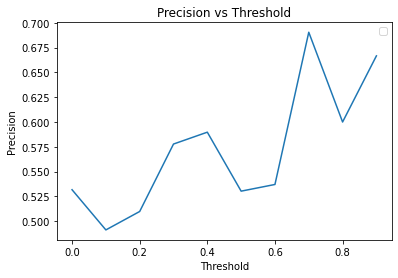

In [75]:
plt.figure()
thresholds = np.array(range(size))/10

plt.plot(thresholds, precisions)
plt.title("Precision vs Threshold")
plt.legend()
plt.ylabel("Precision")
plt.xlabel("Threshold")
plt.show()


In [72]:
#Test
logits = (np.concatenate(test_history, axis=1)*(np.arange(100).reshape(1,-1)/100)).mean(axis=1).reshape(-1) #Scales weights linearly increasing from first epoch to last
#logits = val_preds

size=10
precisions = []
for i in range(size):
    precisions.append(test_labels[logits>=np.quantile(logits, i/size)].mean())
    print(i/size," ",test_labels[logits>=np.quantile(logits, i/size)].mean())

0.0   0.41839762611275966
0.1   0.43973941368078173
0.2   0.45387453874538747
0.3   0.4605809128630705
0.4   0.46078431372549017
0.5   0.5287356321839081
0.6   0.5942028985507246
0.7   0.5686274509803921
0.8   0.6388888888888888
0.9   0.5833333333333334


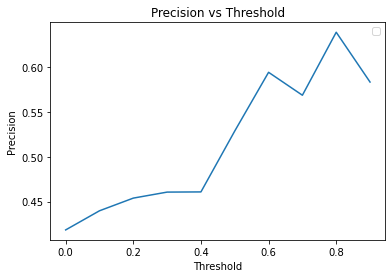

In [73]:
plt.figure()
thresholds = np.array(range(size))/10

plt.plot(thresholds, precisions)
plt.title("Precision vs Threshold")
plt.legend()
plt.ylabel("Precision")
plt.xlabel("Threshold")
plt.show()


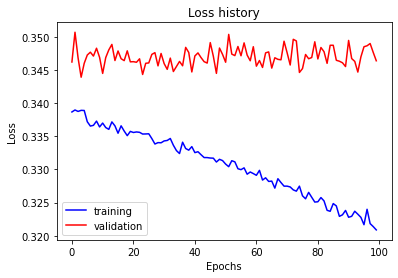

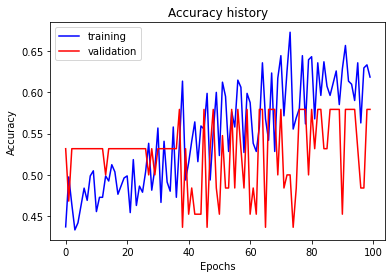

In [76]:
#For just S&P500
"""Plots the loss history"""
plt.figure()
epoch_idxs = range(len(train_loss_history))

plt.plot(epoch_idxs, train_loss_history, "-b", label="training")
plt.plot(epoch_idxs, validation_loss_history, "-r", label="validation")
plt.title("Loss history")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()


"""Plots the accuracy history"""
plt.figure()
epoch_idxs = range(len(train_accuracy_history))
plt.plot(epoch_idxs, train_accuracy_history, "-b", label="training")
plt.plot(epoch_idxs, validation_accuracy_history, "-r", label="validation")
plt.title("Accuracy history")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()


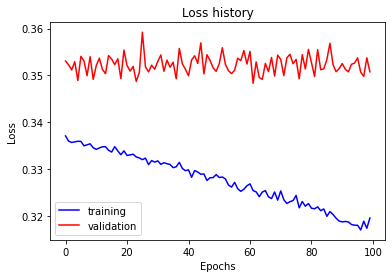

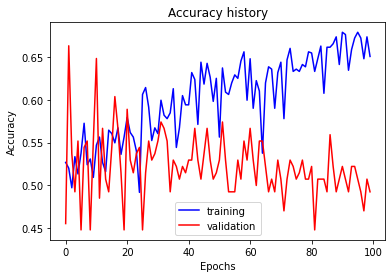

In [ ]:
#For all stocks
"""Plots the loss history"""
plt.figure()
epoch_idxs = range(len(train_loss_history))

plt.plot(epoch_idxs, train_loss_history, "-b", label="training")
plt.plot(epoch_idxs, validation_loss_history, "-r", label="validation")
plt.title("Loss history")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()


"""Plots the accuracy history"""
plt.figure()
epoch_idxs = range(len(train_accuracy_history))
plt.plot(epoch_idxs, train_accuracy_history, "-b", label="training")
plt.plot(epoch_idxs, validation_accuracy_history, "-r", label="validation")
plt.title("Accuracy history")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()


In [ ]:
#Tried using real returns - MSE and L1Loss - got near zero or negative correlations
#Tried having a different output layer for each ticker - worked worse than before